In [2]:
import illoominate
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
train_df = pd.read_csv('data/tafeng/processed/train.csv', sep='\t')
validation_df = pd.read_csv('data/tafeng/processed/valid.csv', sep='\t')

In [6]:
loo_values = illoominate.data_loo_values(
    train_df=train_df,
    validation_df=validation_df,
    model='tifu',
    metric='ndcg@10',
    params={'m':7, 'k':100, 'r_b': 0.9, 'r_g': 0.7, 'alpha': 0.7, 'seed': 42},
)

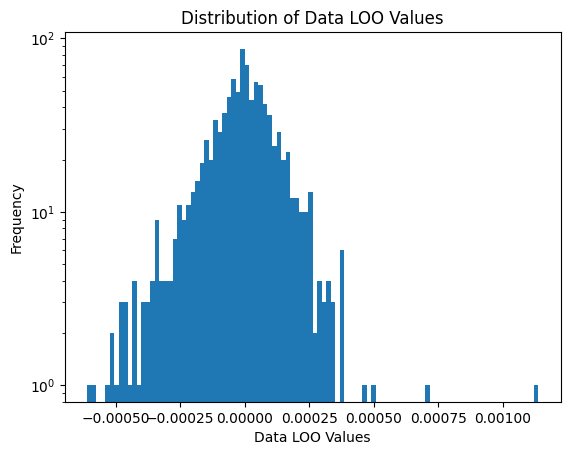

In [5]:
plt.hist(loo_values['score'], density=False, bins=100)
plt.title('Distribution of Data LOO Values')
plt.yscale('log')
plt.ylabel('Frequency')
plt.xlabel('Data LOO Values')
plt.savefig('images/tafeng_loo.png', dpi=300)
plt.show()

In [ ]:
shapley_values = illoominate.data_shapley_values(
    train_df=train_df,
    validation_df=validation_df,
    model='vmis',
    metric='mrr@20',
    params={'m':500, 'k':100, 'seed': 42, 'convergence_threshold': 2000},
)


plt.hist(shapley_values['score'], density=False, bins=100)
plt.title('Distribution of Data Shapley Values')
plt.yscale('log')
plt.ylabel('Frequency')
plt.xlabel('Data Shapley Values')
plt.savefig('images/shapley.png', dpi=300)
plt.show()


In [ ]:
negative = shapley_values[shapley_values.score < 0]
corrupt_sessions = train_df.merge(negative, on='session_id')
corrupt_sessions